In [48]:
# Load required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import plotly.graph_objects as go
# Import plotting package
import plotly.express as px

### Step 1 Basic Information About Datasets

In [49]:
# Load data test dataset
df_test = pd.read_csv('bike_test.csv')
df_test.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,2017-12-26,178,0,-1.4,58,1.0,1880,-8.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-26,127,1,-1.5,62,1.3,2000,-7.8,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-26,85,2,-2.1,69,1.0,1995,-7.0,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-26,72,3,-2.6,70,1.0,1992,-7.3,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-26,49,4,-2.6,72,1.4,1929,-6.9,0.0,0.0,0.0,Winter,No Holiday,Yes


In [50]:
# Load data train dataset
df_train = pd.read_csv('bike_train.csv')
df_train.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [51]:
# Check the data types of the features in the train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   7200 non-null   object 
 1   Rented_Bike_Count      7200 non-null   int64  
 2   Hour                   7200 non-null   int64  
 3   Temperature            7200 non-null   float64
 4   Humidity               7200 non-null   int64  
 5   Wind_speed             7200 non-null   float64
 6   Visibility             7200 non-null   int64  
 7   Dew_point_temperature  7200 non-null   float64
 8   Solar_Radiation        7200 non-null   float64
 9   Rainfall               7200 non-null   float64
 10  Snowfall               7200 non-null   float64
 11  Seasons                7200 non-null   object 
 12  Holiday                7200 non-null   object 
 13  Functioning_Day        7200 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 787.6+ 

In [52]:
# Check the data types of the features in the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   1560 non-null   object 
 1   Rented_Bike_Count      1560 non-null   int64  
 2   Hour                   1560 non-null   int64  
 3   Temperature            1560 non-null   float64
 4   Humidity               1560 non-null   int64  
 5   Wind_speed             1560 non-null   float64
 6   Visibility             1560 non-null   int64  
 7   Dew_point_temperature  1560 non-null   float64
 8   Solar_Radiation        1560 non-null   float64
 9   Rainfall               1560 non-null   float64
 10  Snowfall               1560 non-null   float64
 11  Seasons                1560 non-null   object 
 12  Holiday                1560 non-null   object 
 13  Functioning_Day        1560 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 170.8+ 

In [53]:
# Check the number of observations in the train dataset
df_train.describe()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,705.353889,11.500000,12.800444,58.045556,1.735681,1462.420139,3.941958,0.576522,0.133375,0.075208
std,651.472668,6.922667,11.940619,20.243651,1.046029,597.576433,12.942692,0.876720,1.013633,0.441774
min,0.000000,0.000000,-16.400000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,190.000000,5.750000,3.300000,43.000000,0.900000,984.000000,-4.900000,0.000000,0.000000,0.000000
50%,489.000000,11.500000,13.500000,57.000000,1.500000,1731.000000,4.850000,0.010000,0.000000,0.000000
75%,1069.250000,17.250000,22.325000,74.000000,2.400000,2000.000000,14.600000,0.940000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [54]:
# Check the number of observations in the test dataset
df_test.describe()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
count,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000
mean,701.132051,11.500000,13.263590,59.060256,1.675192,1318.698077,4.682372,0.534904,0.219359,0.074423
std,614.417405,6.924406,11.960682,20.888174,0.988961,642.636665,13.577990,0.830370,1.549383,0.412885
min,0.000000,0.000000,-17.800000,0.000000,0.000000,38.000000,-29.000000,0.000000,0.000000,0.000000
25%,195.000000,5.750000,4.300000,42.000000,0.900000,731.750000,-3.625000,0.000000,0.000000,0.000000
50%,571.000000,11.500000,14.700000,59.000000,1.500000,1387.500000,6.000000,0.010000,0.000000,0.000000
75%,1039.000000,17.250000,22.900000,75.250000,2.300000,1991.250000,16.925000,0.860000,0.000000,0.000000
max,3251.000000,23.000000,38.000000,98.000000,5.700000,2000.000000,26.800000,3.350000,29.500000,3.500000


In [55]:
# Check the number of observations in the train dataset
df_train.shape

(7200, 14)

In [56]:
# Check the number of observations in the test dataset
df_test.shape

(1560, 14)

### Step 2 Feature Visualization

<Axes: title={'center': 'Humidity vs Rented_Bike_Count'}, xlabel='Humidity', ylabel='Temperature'>

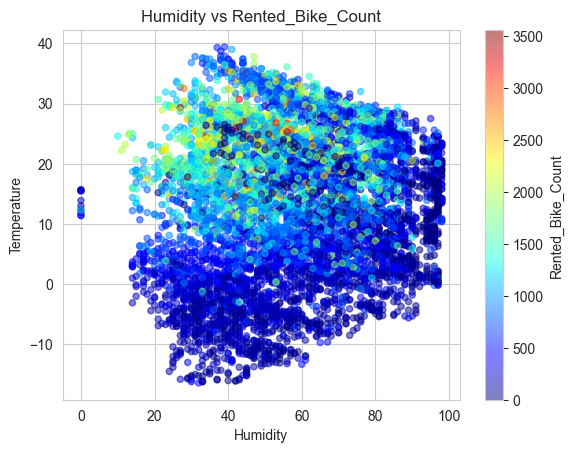

In [57]:
# Visualize the relationship between the features and the response using scatterplots
df_train.plot(kind='scatter', x = 'Humidity', y='Temperature', title='Humidity vs Rented_Bike_Count', alpha=0.5, c= 'Rented_Bike_Count', cmap = plt.get_cmap('jet'), colorbar=True)

<Axes: title={'center': 'Wind_speed vs Rented_Bike_Count'}, xlabel='Wind_speed', ylabel='Temperature'>

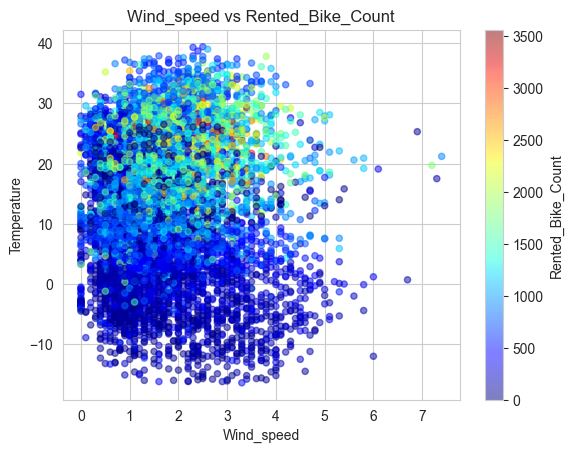

In [58]:
# Visualize the relationship between the features and the response using scatterplots 
df_train.plot(kind='scatter', x = 'Wind_speed', y='Temperature', title='Wind_speed vs Rented_Bike_Count', alpha=0.5, c= 'Rented_Bike_Count', cmap = plt.get_cmap('jet'), colorbar=True)

<Axes: title={'center': 'Visibility vs Rented_Bike_Count'}, xlabel='Visibility', ylabel='Temperature'>

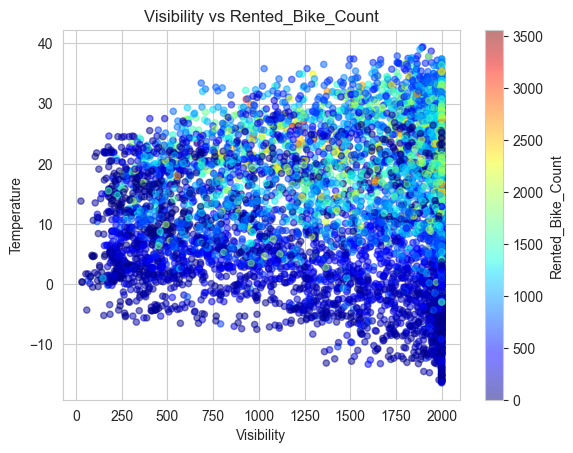

In [59]:
# Visualize the relationship between the features and the response using scatterplots
df_train.plot(kind='scatter', x = 'Visibility', y='Temperature', title='Visibility vs Rented_Bike_Count', alpha=0.5, c= 'Rented_Bike_Count', cmap = plt.get_cmap('jet'), colorbar=True)

<Axes: title={'center': 'Dew_point_temperature vs Rented_Bike_Count'}, xlabel='Dew_point_temperature', ylabel='Temperature'>

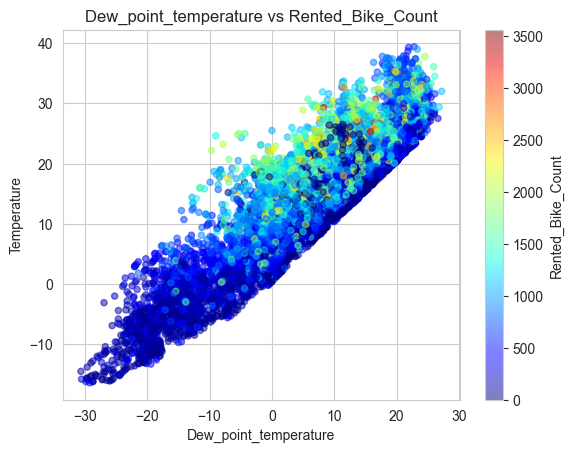

In [60]:
# Visualize the relationship between the features and the response using scatterplots
df_train.plot(kind='scatter', x = 'Dew_point_temperature', y='Temperature', title='Dew_point_temperature vs Rented_Bike_Count', alpha=0.5, c= 'Rented_Bike_Count', cmap = plt.get_cmap('jet'), colorbar=True)

### Step 3 One-Hot Encoding categorical columns using pandas 

In [61]:
# Drop the Date feature from train datasets
atribute = df_train.drop('Date', axis=1)
atribute.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [62]:
# Drop the Date feature from test datasets
atribute1 = df_test.drop('Date', axis=1)
atribute1.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,178,0,-1.4,58,1.0,1880,-8.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,127,1,-1.5,62,1.3,2000,-7.8,0.0,0.0,0.0,Winter,No Holiday,Yes
2,85,2,-2.1,69,1.0,1995,-7.0,0.0,0.0,0.0,Winter,No Holiday,Yes
3,72,3,-2.6,70,1.0,1992,-7.3,0.0,0.0,0.0,Winter,No Holiday,Yes
4,49,4,-2.6,72,1.4,1929,-6.9,0.0,0.0,0.0,Winter,No Holiday,Yes


In [63]:
# Identify categorical columns
categorical_columns = [
    'Seasons',
    'Holiday',
    'Functioning_Day'
]

In [64]:
# One-hot encode categorical columns in the train dataset
df_encoded_train = pd.get_dummies(atribute, columns=categorical_columns, dtype=float, drop_first=True)
df_encoded_train.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [65]:
# One-hot encode categorical columns in the test dataset
df_encoded_test = pd.get_dummies(atribute1, columns=categorical_columns, dtype=float, drop_first=True)
df_encoded_test.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes
0,178,0,-1.4,58,1.0,1880,-8.6,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,127,1,-1.5,62,1.3,2000,-7.8,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,85,2,-2.1,69,1.0,1995,-7.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,72,3,-2.6,70,1.0,1992,-7.3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,49,4,-2.6,72,1.4,1929,-6.9,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


### Step 3.1 Compute the Matrix of Correlations

In [66]:
# Compute and visualized the correlation matrix between variables
corr = df_encoded_train.corr()
corr
# Finding the pair of features with the highest absolute correlation
highest_corr_pair = corr.abs().unstack().sort_values(ascending=False).drop_duplicates()
highest_corr_pair = highest_corr_pair[highest_corr_pair < 1]# Remove self-correlations
highest_corr_pair.head()

Dew_point_temperature  Temperature       0.910930
Seasons_Winter         Temperature       0.737053
Dew_point_temperature  Seasons_Winter    0.725108
Temperature            Seasons_Summer    0.668351
Dew_point_temperature  Seasons_Summer    0.638402
dtype: float64

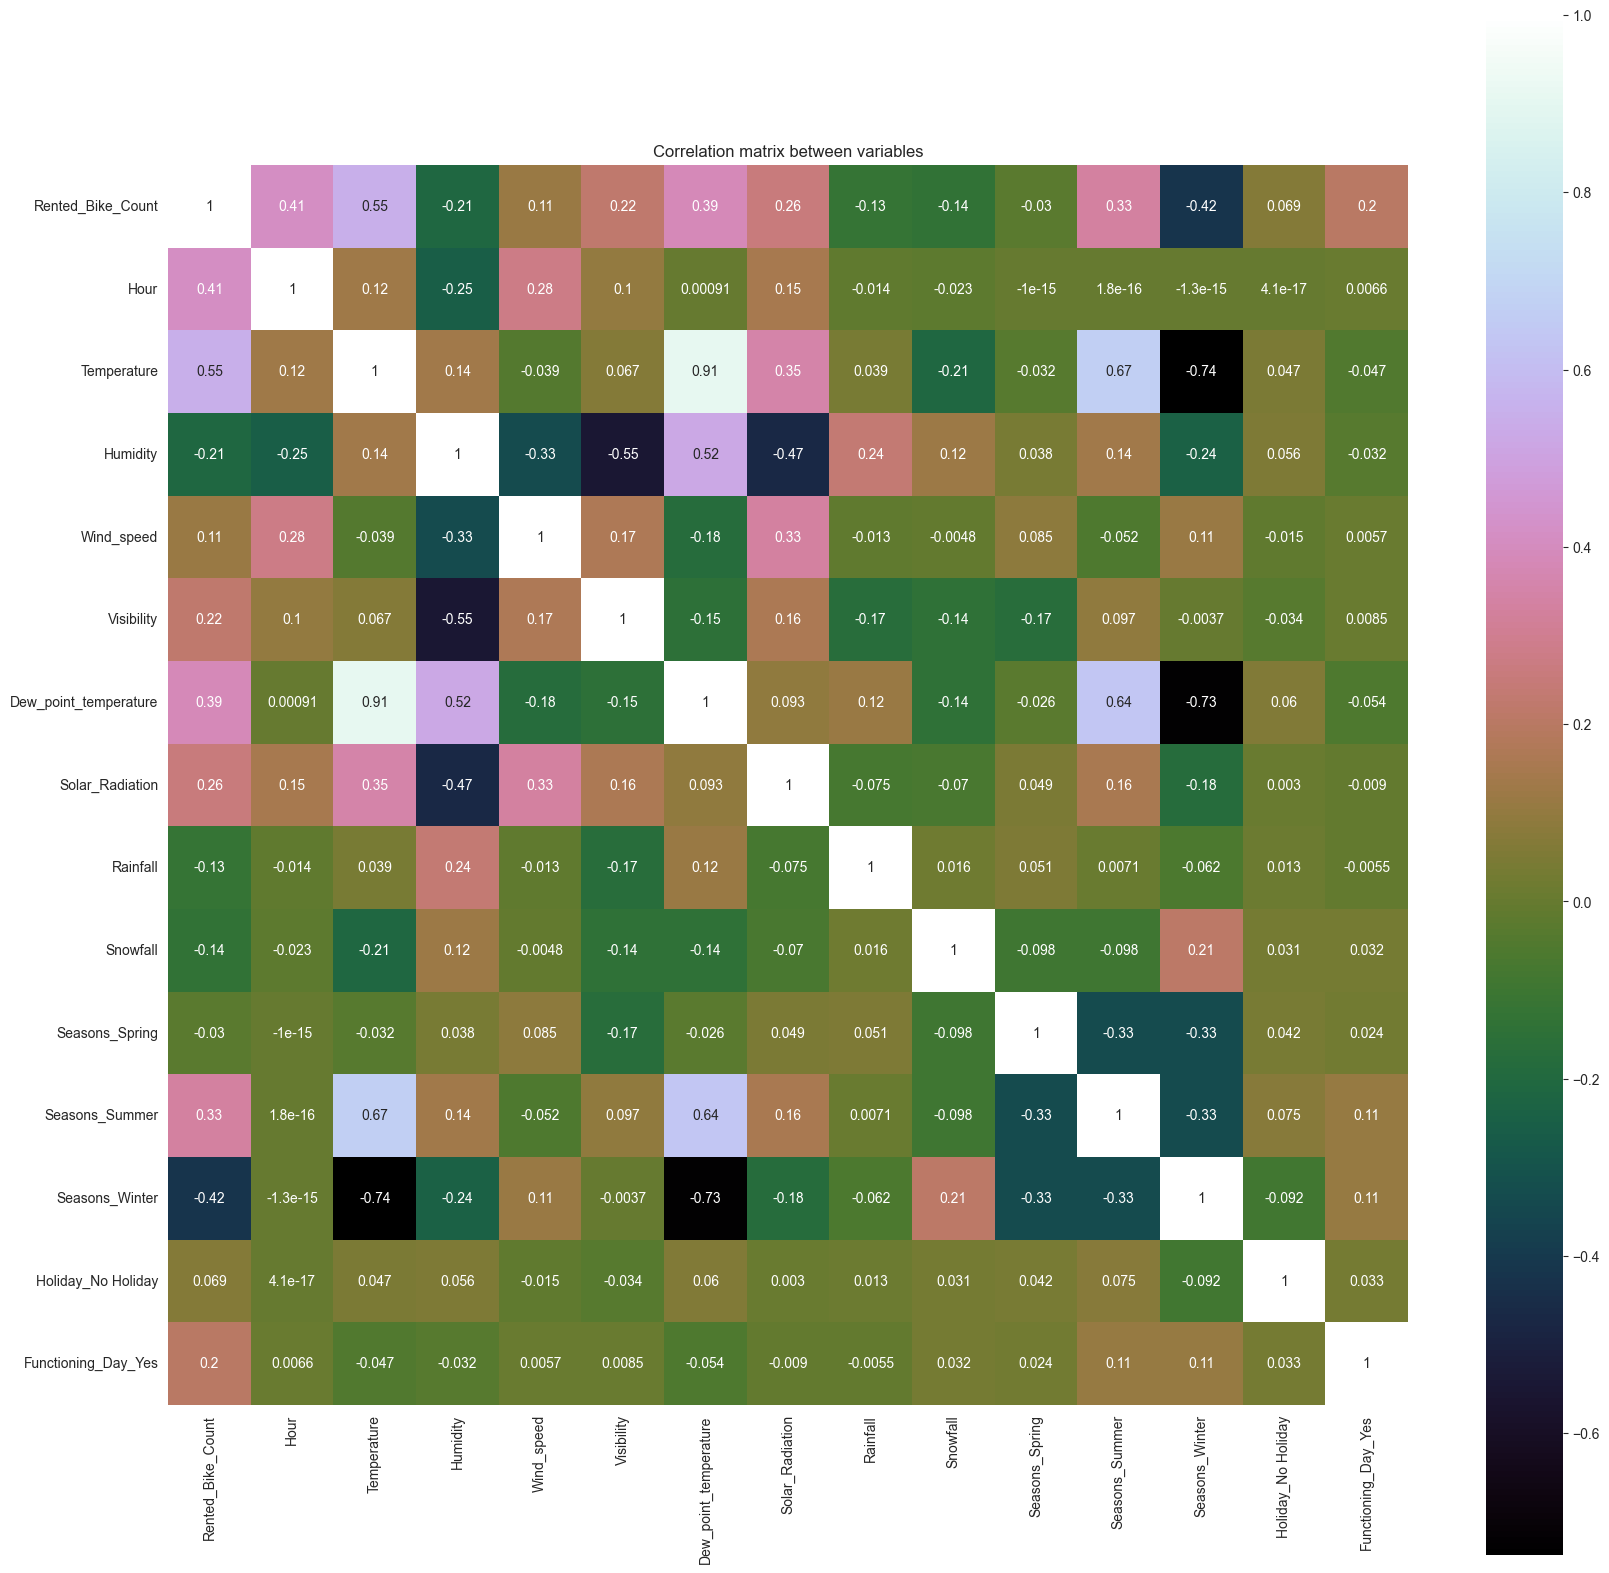

In [67]:
# Visualize the correlation matrix for better interpretation (visualisation example 1)
plt.figure(figsize=(20, 20)) # Set the size of the figure
sns.heatmap(corr, vmax=1, square=True, annot=True, cmap='cubehelix')# Plot the correlation matrix as a heatmap
plt.title('Correlation matrix between variables')# Set the title of the figure
plt.show()# Show the figure

In [68]:
# Visualize the correlation matrix for better interpretation (visualisation example 2)
fig = go.Figure(go.Heatmap(z = corr.values.tolist(),
                           x = corr.columns,
                           y = corr.columns,
                           colorscale='rdylgn',
                           zmin=-1,
                           zmax=1),
                layout = go.Layout(width=800, height=800,
                                   xaxis_showgrid=False,
                                   yaxis_showgrid=False,
                                   yaxis_autorange='reversed'))
fig.update_layout(title='Correlation matrix between variables',
                  legend_title='Pearson Coefficient',
                  font = dict(family = 'sans-serif, sans-serif',
                              size = 18,
                              color = "black"),
                  margin = dict(l=0, r=0,b=0))
fig.show(config={'displayModeBar': False})

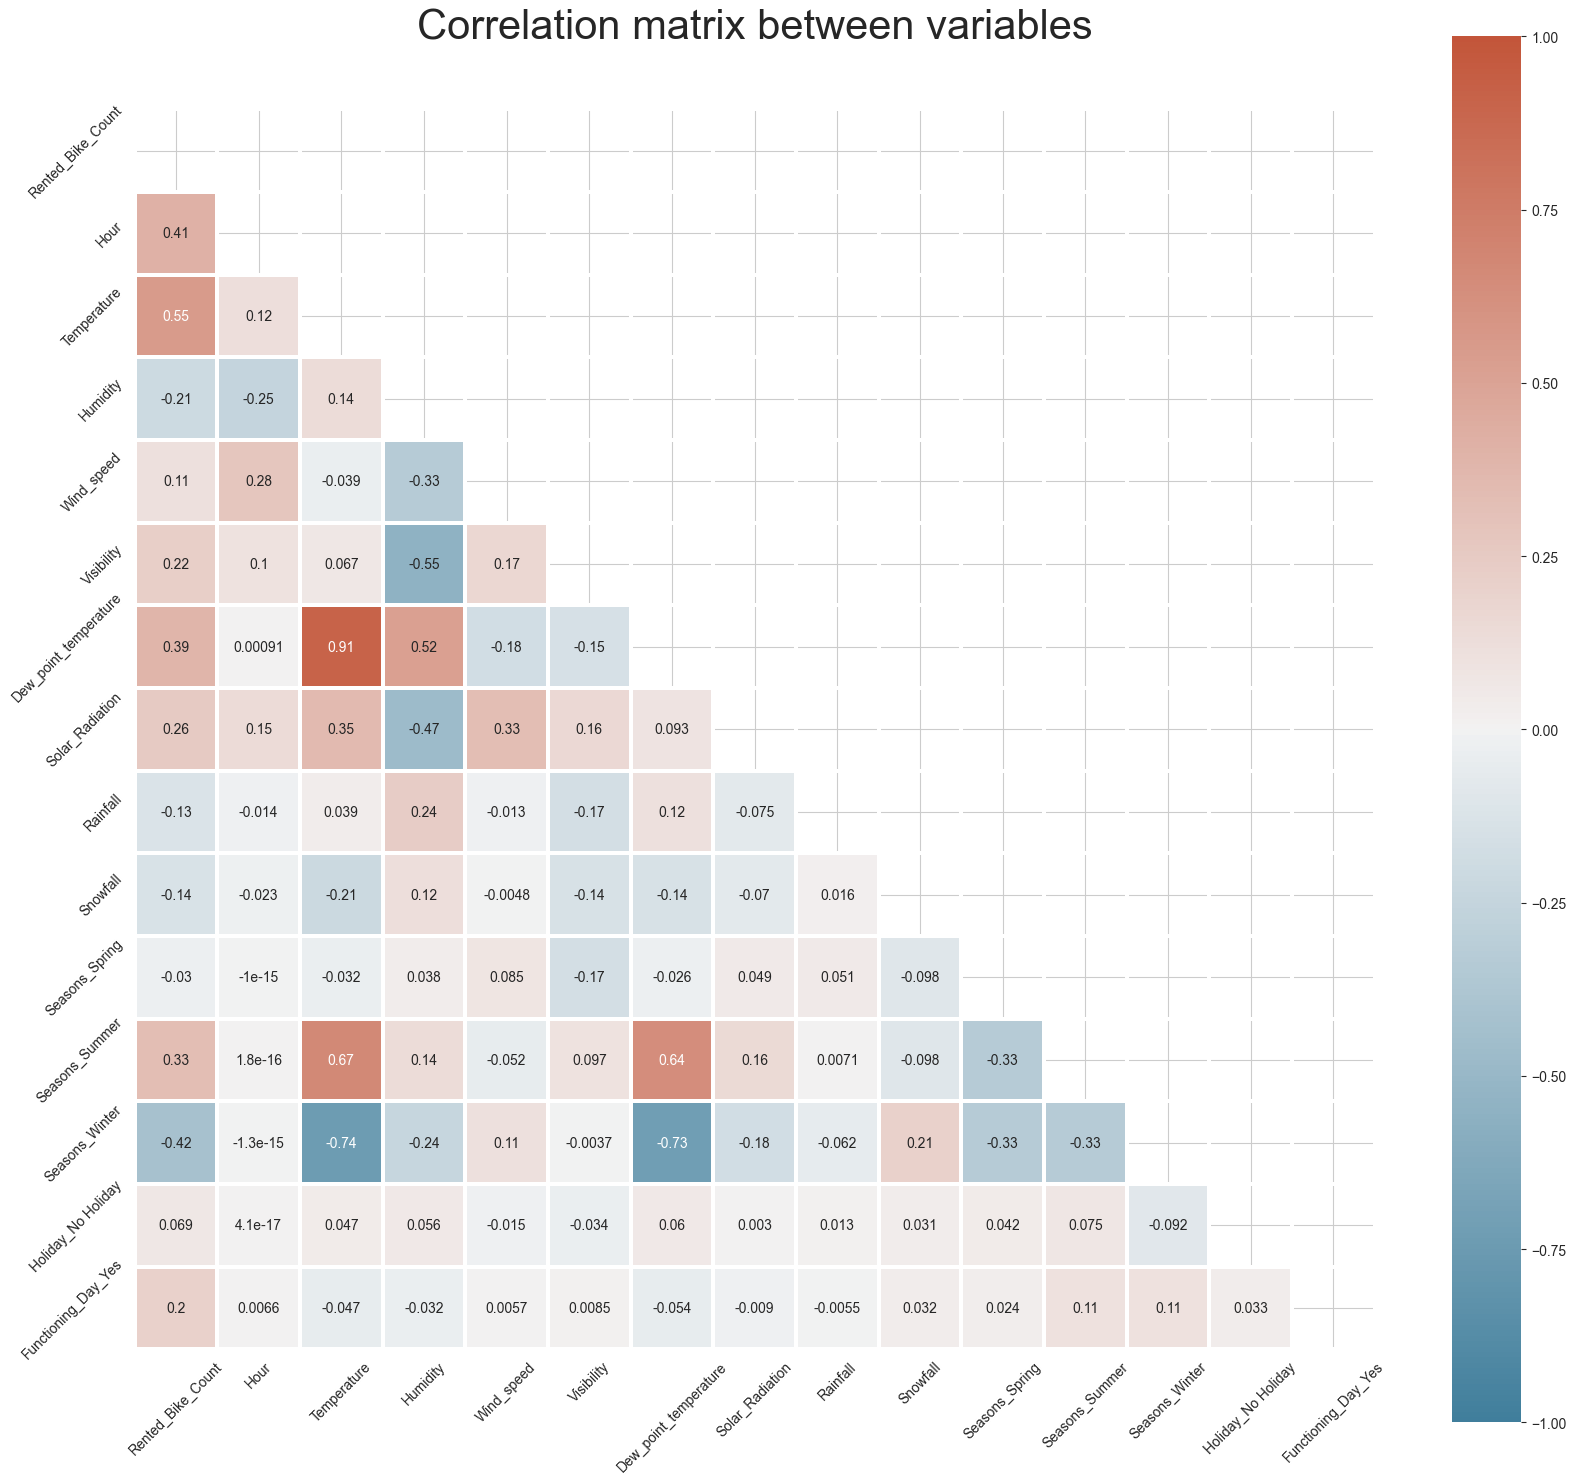

In [69]:
# Visualize the correlation matrix for better interpretation (visualisation example 3)
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=1.5, cbar_kws={"shrink": .9}, annot=True)

plt.title('Correlation matrix between variables', size = 30, y = 1.05)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()



<Axes: title={'center': 'Temperature vs Dew_point_temperature'}, xlabel='Temperature', ylabel='Dew_point_temperature'>

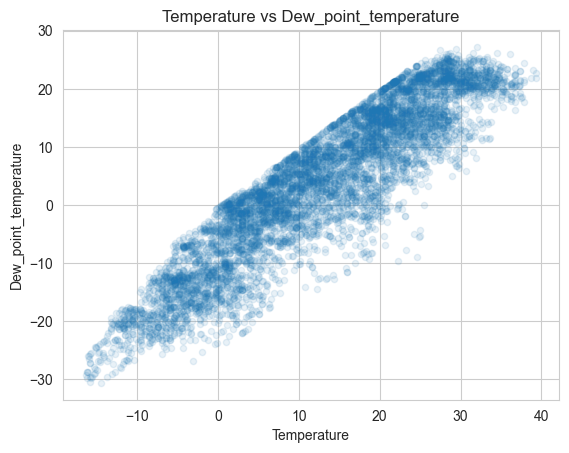

In [70]:
# Ploting the scatter matrix for strong possitive correlation for Dew_point_temperature and Temperature
df_encoded_train.plot(kind='scatter', x = 'Temperature', y='Dew_point_temperature', title='Temperature vs Dew_point_temperature', alpha=0.1)

### Step 4 Train Linear Regression Model


In [71]:
# Train a linear regression model and predict the "Rented Bike Count" for the testing dataset.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [72]:
# Drop foreacasting feature "Rented_Bike_Count" from train dataset
X_train = df_encoded_train.drop('Rented_Bike_Count', axis=1)
# Created a target dataset for train dataset
y_train = df_encoded_train['Rented_Bike_Count']

In [73]:
# Drop foreacasting feature "Rented_Bike_Count" from test dataset
X_test = df_encoded_test.drop('Rented_Bike_Count', axis=1)
# Created a target dataset for test dataset
y_test = df_encoded_test['Rented_Bike_Count']

In [74]:
# Trainig the linear regression model
model = LinearRegression()
# Fit the model
model.fit(X_train,y_train)
# Predict the "Rented Bike Count" for the testing dataset
y_pred = model.predict(X_test)

In [75]:
# Put data to plot in dataframe
df_plot = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Make scatter plot from data
fig = px.scatter(df_plot, x='Actual', y='Predicted', title='Actual vs Predicted')
# Add straight line indicating perfect model
fig.add_shape(type='line',x0=0, x1=3000, y0=0, y1=1000, line = dict(color='red', width=4, dash='dot',), )
fig.show()

In [76]:
# Print the root mean square error (RMS)
error = np.sqrt(np.mean((np.array(y_test) - np.array(y_pred)) ** 2)) # Calculate the root mean square error (RMS)
print(f"RMS: {error:.4f} ")

# Print the R2 measure of fit
r2=r2_score(y_test, y_pred)
print(f"R2: {round(r2,4)}")


RMS: 428.8014 
R2: 0.5126


### Step 5 Transforming the Response Variable

In [77]:
#Applying the given logarithmic transformation to the "Rented Bike Count" in both datasets
df_encoded_train['Rented_Bike_Count'] = np.log(df_encoded_train['Rented_Bike_Count'] + 1)
df_encoded_test['Rented_Bike_Count'] = np.log(df_encoded_test['Rented_Bike_Count'] + 1)


In [78]:
# Retrain the linear regression model on the transformed train dataset
X_train_transformed = df_encoded_train.drop('Rented_Bike_Count', axis=1)
y_train_transformed = df_encoded_train['Rented_Bike_Count']

In [79]:

X_test_transformed = df_encoded_test.drop('Rented_Bike_Count', axis=1)
y_test_transformed = df_encoded_test['Rented_Bike_Count']

In [80]:
# Train linear regression model on the train dataset and predict counts of rented bikes for the test data set
model_transformed = LinearRegression()
model_transformed.fit(X_train_transformed,y_train_transformed)
y_pred_transformed = model_transformed.predict(X_test)

In [81]:
# Plot predicted and (transformed) true rented bike counts.
df_plot = pd.DataFrame({'Actual': y_test_transformed, 'Predicted': y_pred_transformed})
# Make scatter plot from data
fig = px.scatter(df_plot, x='Actual', y='Predicted', title='Actual vs Predicted')
# Adding straight line indicating perfect model
fig.add_shape(type='line',x0=0, x1=8, y0=0, y1=8, line = dict(color='red', width=4, dash='dot',), )
fig.show()



In [82]:
# Print the Root mean square error (RMS)
error = np.sqrt(np.mean((np.array(y_test_transformed) - np.array(y_pred_transformed)) ** 2))
print(f"RMS: {error:.4f} ")

# Print the R2 measure of fit
r2=r2_score(y_test_transformed, y_pred_transformed)
print(f"R2: {round(r2,4)}")


RMS: 0.7219 
R2: 0.7766


### Step 6: Linear Regression with Interaction Effects

In [83]:
# List of features to consider for interaction terms
features_for_interaction = [
    'Temperature',
    'Humidity',
    'Wind_speed',
    'Hour'
]

In [84]:
# Dictionary to store results
interaction_results = {}
# Training models with and without interaction terms
for i in range(len(features_for_interaction)):#  Creating interaction term for each feature 
    for j in range(i+1, len(features_for_interaction)):# Creating interaction term
        feature1 = features_for_interaction[i]
        feature2 = features_for_interaction[j]

        # Creating interaction term
        interaction_term = f"{feature1}_x_{feature2}"
        X_train[interaction_term] = X_train[feature1] * X_train[feature2] 
        X_test[interaction_term] = X_test[feature1] * X_test[feature2]

        # Model without interaction term
        X_train_no_interact = X_train.drop(columns=[interaction_term])
        lr_model_no_interact = LinearRegression()
        lr_model_no_interact.fit(X_train_no_interact, y_train_transformed)
        y_pred_no_interact = lr_model_no_interact.predict(X_test.drop(columns=[interaction_term]))
        r2_no_interact = r2_score(y_test_transformed, y_pred_no_interact)

        # Model with interaction term
        lr_model_interact = LinearRegression()
        lr_model_interact.fit(X_train, y_train_transformed)
        y_pred_interact = lr_model_interact.predict(X_test)
        r2_interact = r2_score(y_test_transformed, y_pred_interact)

        # Storing results
        interaction_results[interaction_term] = {'R2_no_interact': r2_no_interact, 'R2_interact': r2_interact}

# Displaying the results in a table format
interaction_results_df = pd.DataFrame(interaction_results).T
interaction_results_df
        


,R2_no_interact,R2_interact
Temperature_x_Humidity,0.776575,0.774694
Temperature_x_Wind_speed,0.774694,0.775086
Temperature_x_Hour,0.775086,0.775154
Humidity_x_Wind_speed,0.775154,0.775942
Humidity_x_Hour,0.775942,0.776740
Wind_speed_x_Hour,0.776740,0.776647


### Step 7: Feature Transformations

In [85]:
X_train = df_encoded_train.drop('Rented_Bike_Count', axis=1)
X_test = df_encoded_test.drop('Rented_Bike_Count', axis=1)

# Dictionary to store results
transformation_results = {}

# Applying transformations and training models
for feature in features_for_interaction:
    for transform in ['log', 'sqrt', 'square']:
        # Creating transformed feature
        transformed_feature = f"{feature}_{transform}"

        if transform == 'log':
            if np.any(X_train[feature] < 0) or np.any(X_test[feature] < 0):
                continue  # Skip this transformation for negative values
            X_train[transformed_feature] = np.log1p(X_train[feature])
            X_test[transformed_feature] = np.log1p(X_test[feature])
        elif transform == 'sqrt':
            # Skip sqrt for negative values
            if np.any(X_train[feature] < 0) or np.any(X_test[feature] < 0):
                continue
            X_train[transformed_feature] = np.sqrt(X_train[feature])
            X_test[transformed_feature] = np.sqrt(X_test[feature])
        elif transform == 'square':
            X_train[transformed_feature] = X_train[feature] ** 2
            X_test[transformed_feature] = X_test[feature] ** 2

        # Check for NaNs in transformed features
        if X_train[transformed_feature].isnull().any() or X_test[transformed_feature].isnull().any():
            continue

        # Training the model with the transformed feature
        lr_model_transformed_feature = LinearRegression()
        lr_model_transformed_feature.fit(X_train, y_train_transformed)

        # Making predictions
        y_pred_transformed_feature = lr_model_transformed_feature.predict(X_test)

        # Calculating R2 score
        r2_transformed_feature = r2_score(y_test_transformed, y_pred_transformed_feature)

        # Storing results
        transformation_results[transformed_feature] = r2_transformed_feature
        
# Displaying the results in a table format
transformation_results_df = pd.DataFrame(list(transformation_results.items()), columns=['Transformed_Feature', 'R2'])
transformation_results_df.sort_values(by='R2', ascending=False)


,Transformed_Feature,R2
9,Hour_square,0.823768
8,Hour_sqrt,0.816309
7,Hour_log,0.815948
6,Wind_speed_square,0.811644
3,Humidity_square,0.811571
4,Wind_speed_log,0.811559
5,Wind_speed_sqrt,0.811415
2,Humidity_sqrt,0.799398
1,Humidity_log,0.795817
0,Temperature_square,0.776687


/Users/airidas/Documents/MLAI Engineering/tennis_ace_starting/P160B124 Machine Learning Methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/airidas/Documents/MLAI Engineering/tennis_ace_starting/P160B124 Machine Learning Methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/airidas/Documents/MLAI Engineering/tennis_ace_starting/P160B124 Machine Learning Methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Figure size 1200x800 with 0 Axes>

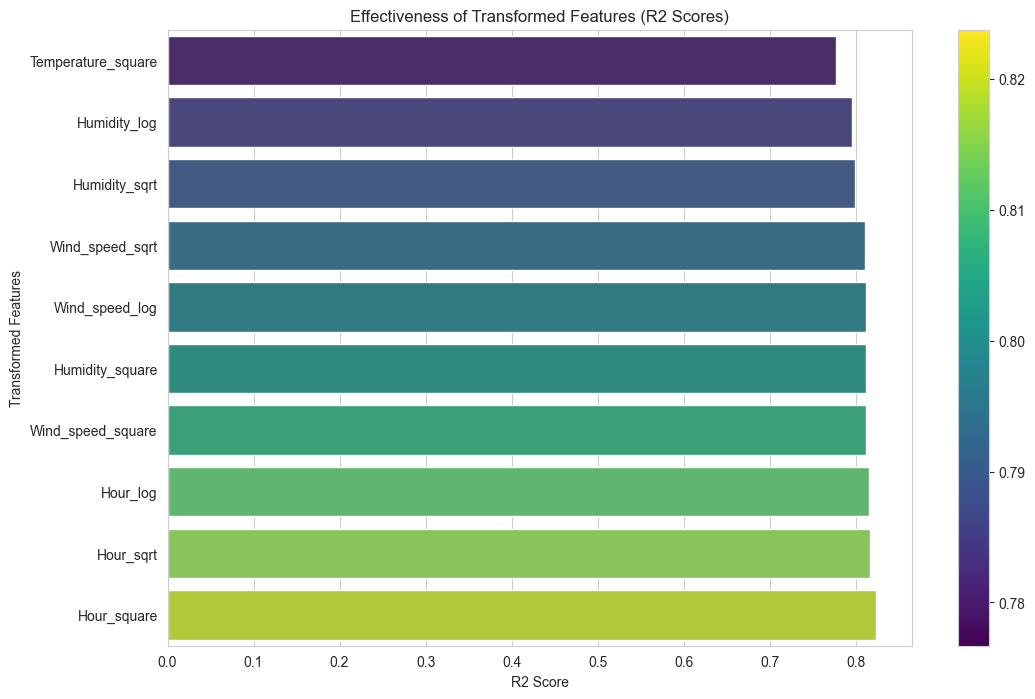

In [86]:
# Visualizing the results in a bar plot for better interpretation 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
plt.figure(figsize=(12, 8))
ax = sns.barplot(y='Transformed_Feature', x='R2', data=transformation_results_df.sort_values(by='R2', ascending=True), palette='viridis')
plt.title('Effectiveness of Transformed Features (R2 Scores)')
plt.xlabel('R2 Score')
plt.ylabel('Transformed Features')

# Specify the Axes (ax) for the colorbar
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=transformation_results_df['R2'].min(), vmax=transformation_results_df['R2'].max())), ax=ax)

plt.show()